In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [2]:
adata = sc.read_10x_h5(
    filename="ZB4171/Xenium_V1_FFPE_wildtype_13_4_months_outs/cell_feature_matrix.h5"
)

In [3]:
adata

AnnData object with n_obs × n_vars = 59935 × 347
    var: 'gene_ids', 'feature_types', 'genome'

In [4]:
df = pd.read_csv(
    "ZB4171/Xenium_V1_FFPE_wildtype_13_4_months_outs/cells.csv.gz", compression="gzip"
)

In [5]:
df

cell_id   x_centroid   y_centroid  transcript_counts  \
0      aaadnakl-1   828.681882   864.786234                122   
1      aaaeaoem-1   402.323978   862.381860                 55   
2      aaaebjlp-1   313.647847   864.750073                160   
3      aaahenla-1   800.255441   861.643350                 88   
4      aaahgemb-1   367.736646   863.483893                 49   
...           ...          ...          ...                ...   
59930  oiminpdh-1  5140.818677  4367.115308                 12   
59931  oimjabgg-1  5447.845898  4789.268970                 25   
59932  oimjaijc-1  5416.025269  4817.583350                 22   
59933  oimjkjbp-1  6614.144263  2922.116968                  2   
59934  oimjpmlh-1  6622.072339  3202.391602                  6   

       control_probe_counts  control_codeword_counts  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
59930                     0                        0   
59931                     0                        0   
59932                     0                        0   
59933                     0                        0   
59934                     0                        0   

       unassigned_codeword_counts  total_counts    cell_area  nucleus_area  
0                               0           122   235.986562     27.590469  
1                               0            55   132.849688     15.804688  
2                               0           160   614.350781     27.184062  
3                               0            88   206.680156     23.120000  
4                               0            49    85.571094     17.475469  
...                           ...           ...          ...           ...  
59930                           0            12  1009.422812     28.493594  
59931                           0            25   859.278281      9.257031  
59932                           0            22   889.849063     12.192187  
59933                           0             2   836.474375      8.850625  
59934                           0             6   838.732188      7.315313  

[59935 rows x 10 columns]

In [6]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [7]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [8]:
adata.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
aaadnakl-1  aaadnakl-1   828.681882   864.786234                122   
aaaeaoem-1  aaaeaoem-1   402.323978   862.381860                 55   
aaaebjlp-1  aaaebjlp-1   313.647847   864.750073                160   
aaahenla-1  aaahenla-1   800.255441   861.643350                 88   
aaahgemb-1  aaahgemb-1   367.736646   863.483893                 49   
...                ...          ...          ...                ...   
oiminpdh-1  oiminpdh-1  5140.818677  4367.115308                 12   
oimjabgg-1  oimjabgg-1  5447.845898  4789.268970                 25   
oimjaijc-1  oimjaijc-1  5416.025269  4817.583350                 22   
oimjkjbp-1  oimjkjbp-1  6614.144263  2922.116968                  2   
oimjpmlh-1  oimjpmlh-1  6622.072339  3202.391602                  6   

            control_probe_counts  control_codeword_counts  \
aaadnakl-1                     0                        0   
aaaeaoem-1                     0                        0   
aaaebjlp-1                     0                        0   
aaahenla-1                     0                        0   
aaahgemb-1                     0                        0   
...                          ...                      ...   
oiminpdh-1                     0                        0   
oimjabgg-1                     0                        0   
oimjaijc-1                     0                        0   
oimjkjbp-1                     0                        0   
oimjpmlh-1                     0                        0   

            unassigned_codeword_counts  total_counts    cell_area  \
aaadnakl-1                           0           122   235.986562   
aaaeaoem-1                           0            55   132.849688   
aaaebjlp-1                           0           160   614.350781   
aaahenla-1                           0            88   206.680156   
aaahgemb-1                           0            49    85.571094   
...                                ...           ...          ...   
oiminpdh-1                           0            12  1009.422812   
oimjabgg-1                           0            25   859.278281   
oimjaijc-1                           0            22   889.849063   
oimjkjbp-1                           0             2   836.474375   
oimjpmlh-1                           0             6   838.732188   

            nucleus_area  
aaadnakl-1     27.590469  
aaaeaoem-1     15.804688  
aaaebjlp-1     27.184062  
aaahenla-1     23.120000  
aaahgemb-1     17.475469  
...                  ...  
oiminpdh-1     28.493594  
oimjabgg-1      9.257031  
oimjaijc-1     12.192187  
oimjkjbp-1      8.850625  
oimjpmlh-1      7.315313  

[59935 rows x 10 columns]

In [9]:
adata.to_df()

2010300C02Rik  Abca7  Acsbg1  Acta2  Acvrl1  Adamts2  Adamtsl1  \
aaadnakl-1            1.0    0.0     0.0    4.0     0.0      0.0       0.0   
aaaeaoem-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
aaaebjlp-1            0.0    0.0     2.0    0.0     0.0      0.0       2.0   
aaahenla-1            0.0    0.0     0.0    2.0     0.0      0.0       0.0   
aaahgemb-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
...                   ...    ...     ...    ...     ...      ...       ...   
oiminpdh-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
oimjabgg-1            0.0    0.0     1.0    0.0     0.0      0.0       0.0   
oimjaijc-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
oimjkjbp-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
oimjpmlh-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   

            Adgrl4  Aldh1a2  Aldh1l1  ...  Unc13c  Vat1l  Vcan  Vim  Vip  \
aaadnakl-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  7.0  0.0   
aaaeaoem-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0  0.0   
aaaebjlp-1     0.0      0.0      0.0  ...     0.0    1.0   0.0  6.0  0.0   
aaahenla-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  1.0  0.0   
aaahgemb-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  2.0  0.0   
...            ...      ...      ...  ...     ...    ...   ...  ...  ...   
oiminpdh-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0  0.0   
oimjabgg-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0  0.0   
oimjaijc-1     0.0      0.0      0.0  ...     0.0    1.0   0.0  1.0  0.0   
oimjkjbp-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0  0.0   
oimjpmlh-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0  0.0   

            Vwc2l  Wfs1  Zfp366  Zfp536  Zfpm2  
aaadnakl-1    0.0   0.0     0.0     0.0    0.0  
aaaeaoem-1    0.0   1.0     0.0     0.0    0.0  
aaaebjlp-1    0.0   1.0     0.0     0.0    0.0  
aaahenla-1    0.0   0.0     0.0     0.0    0.0  
aaahgemb-1    0.0   0.0     0.0     0.0    0.0  
...           ...   ...     ...     ...    ...  
oiminpdh-1    0.0   0.0     0.0     0.0    0.0  
oimjabgg-1    0.0   0.0     0.0     0.0    0.0  
oimjaijc-1    1.0   0.0     0.0     0.0    0.0  
oimjkjbp-1    0.0   0.0     0.0     0.0    0.0  
oimjpmlh-1    0.0   0.0     0.0     0.0    0.0  

[59935 rows x 347 columns]

**Quality Control**

In [10]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [11]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.03572607762076036
Negative decoding count % : 0.005173448398634697


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

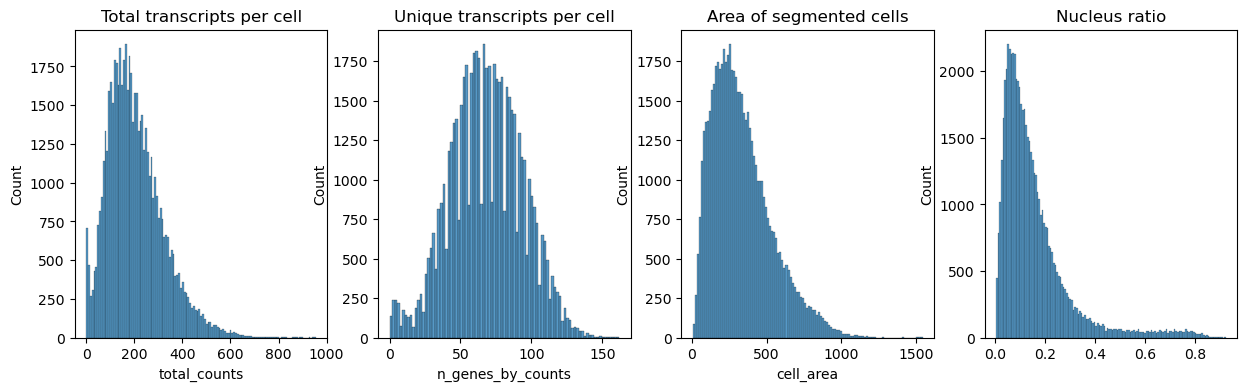

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [13]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [14]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


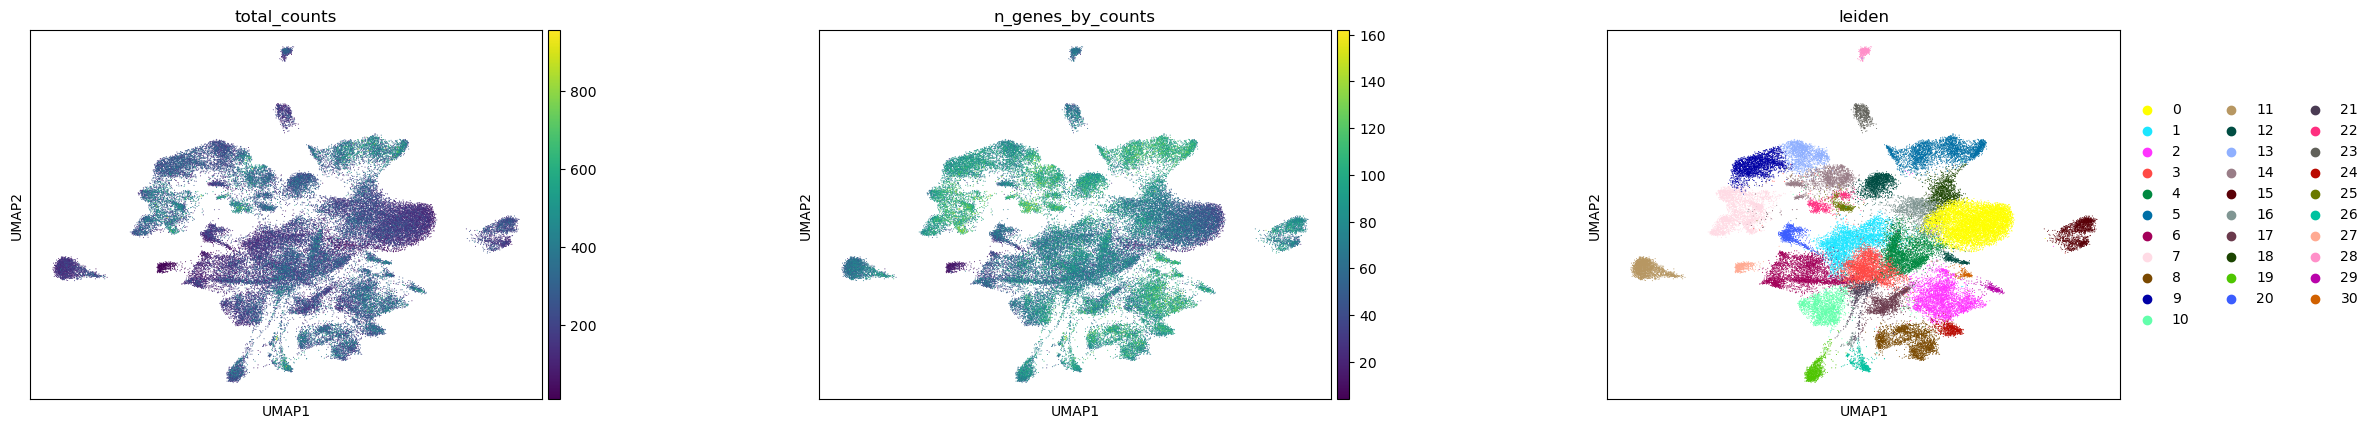

In [15]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

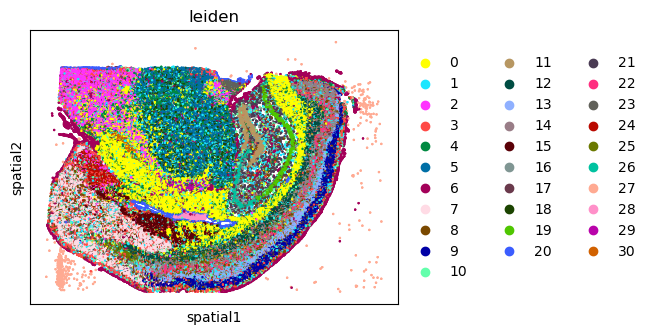

In [16]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


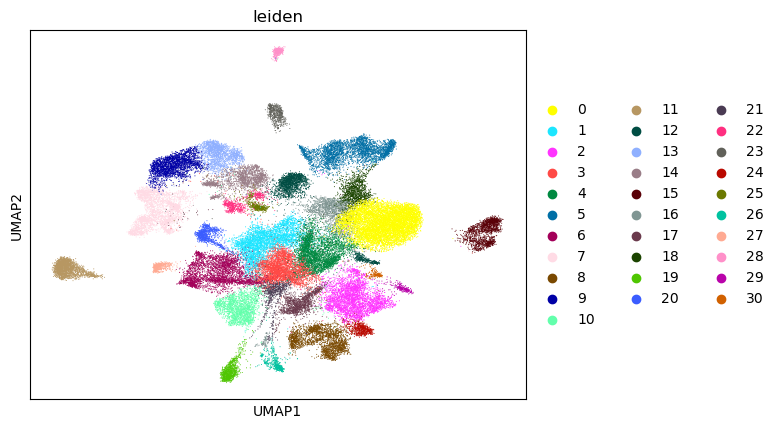

In [17]:
sc.pl.umap(
    adata,
    color=[
        "leiden"
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


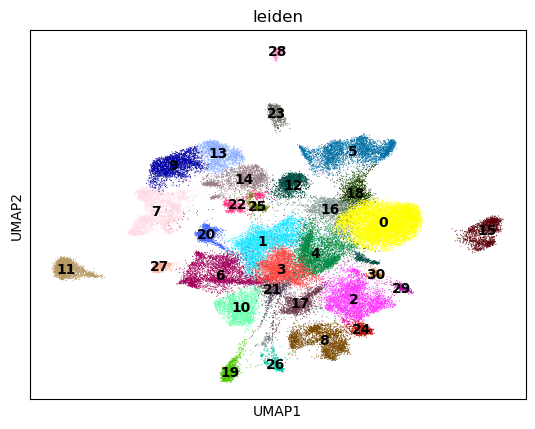

In [18]:
sc.pl.umap(
    adata,
    color=[
        "leiden"],
    legend_loc='on data',
    wspace=0.4,
)

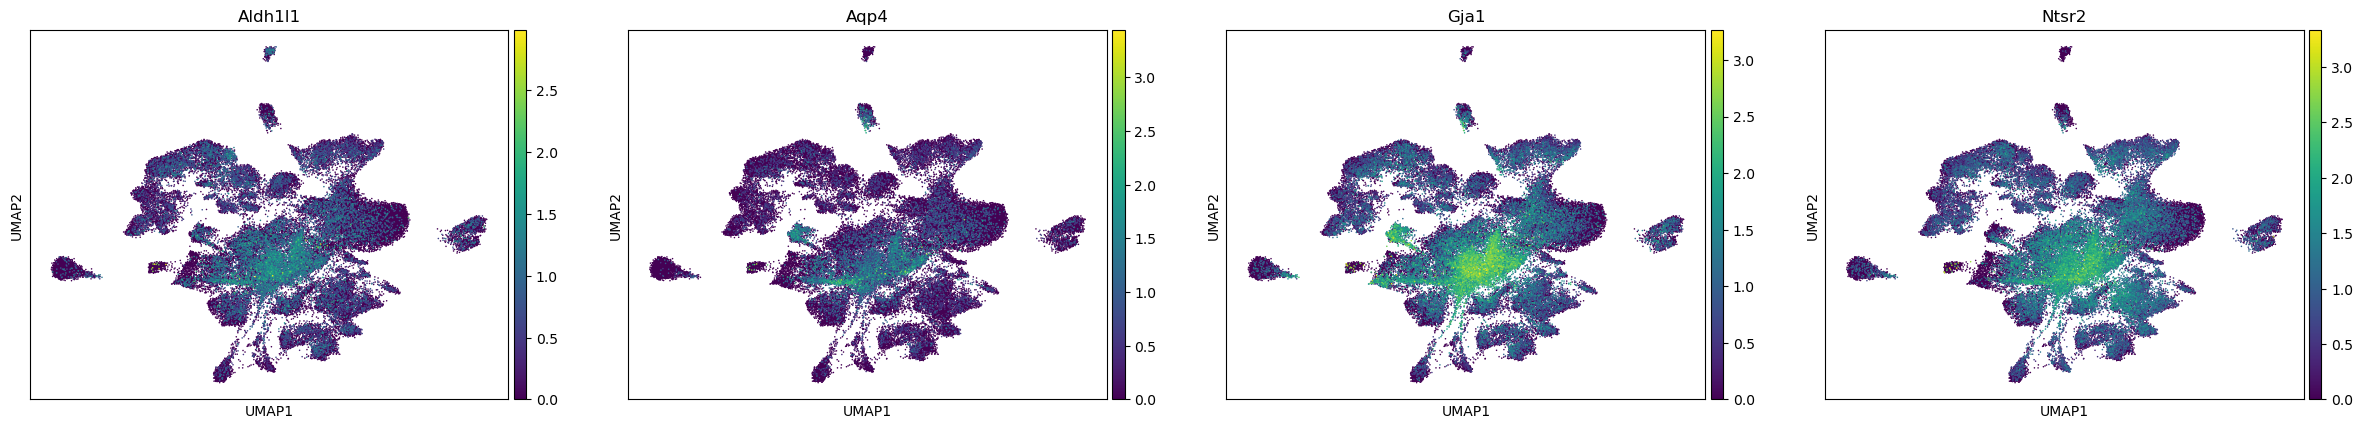

In [19]:
#Astrocytes
sc.pl.umap(adata,
           color=["Aldh1l1", "Aqp4", "Gja1", "Ntsr2"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

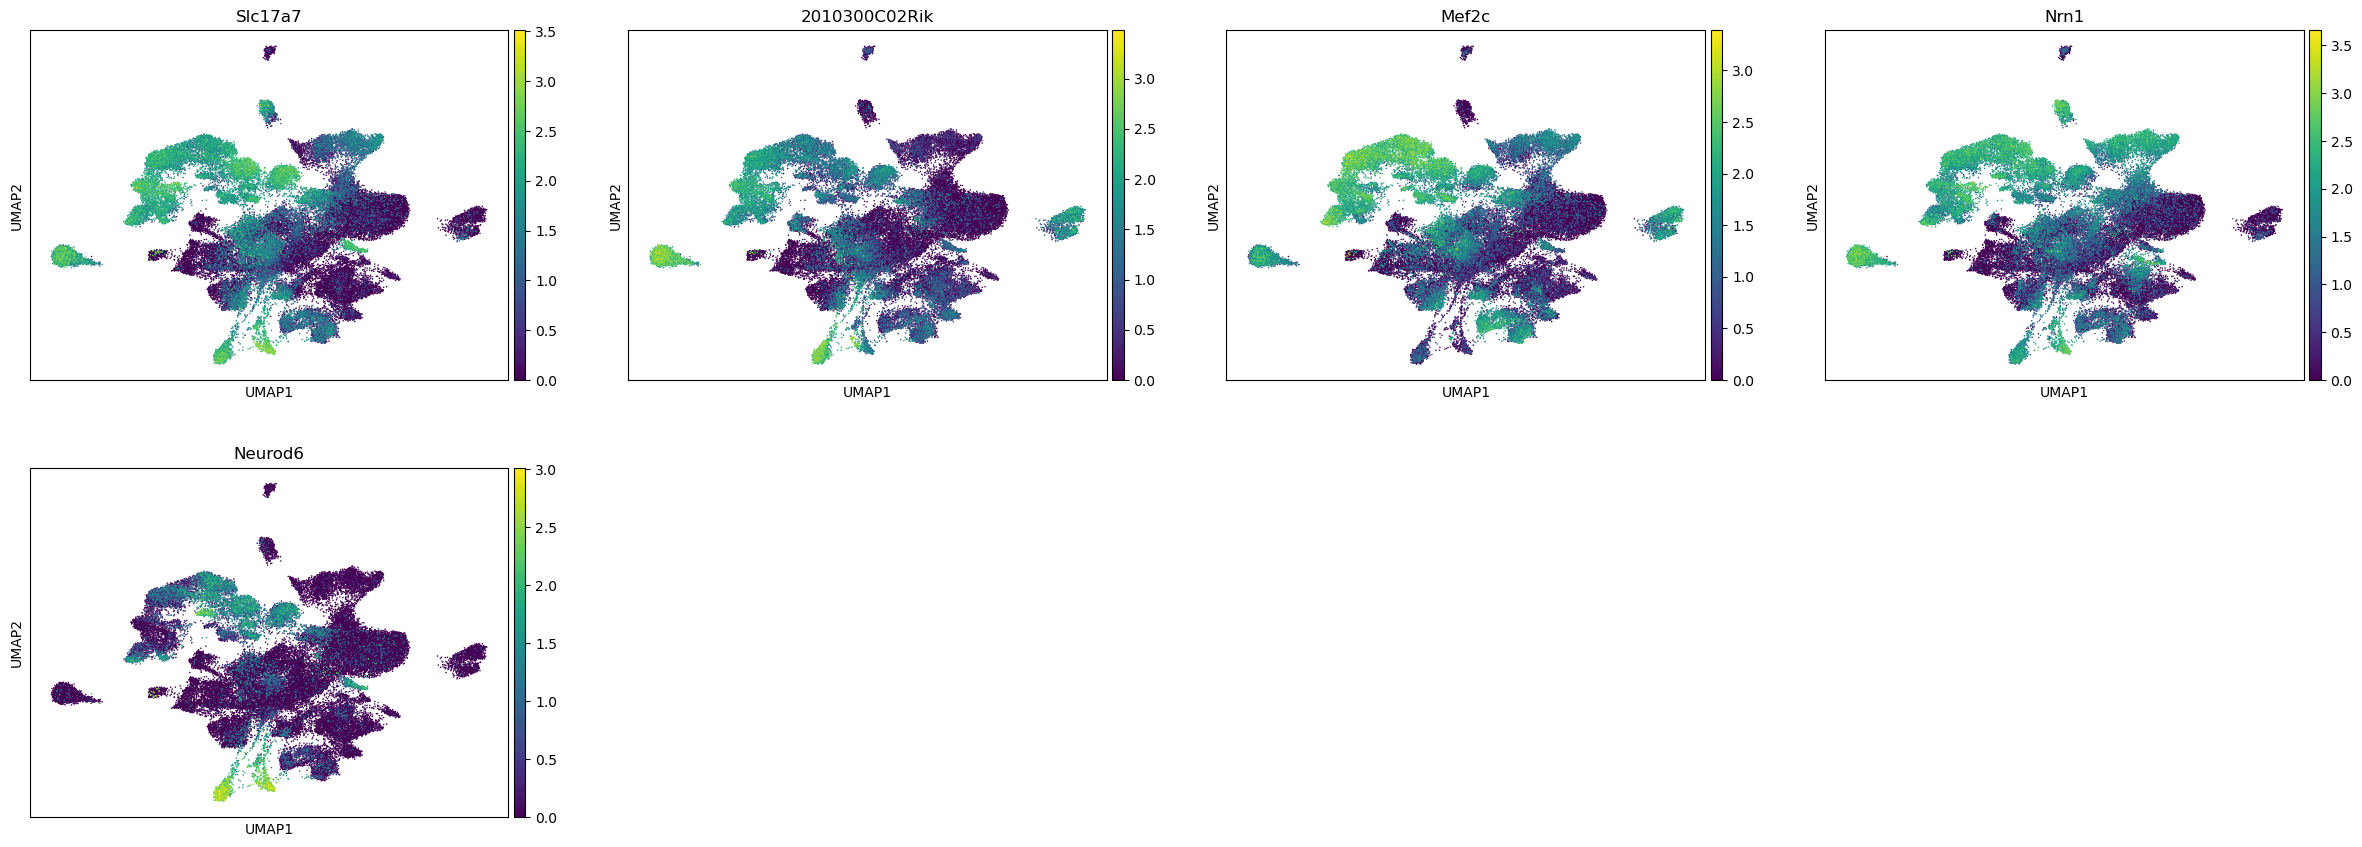

In [20]:
#Excitory Neurons
sc.pl.umap(adata,
           color=["Slc17a7", "2010300C02Rik", "Mef2c", "Nrn1", "Neurod6"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

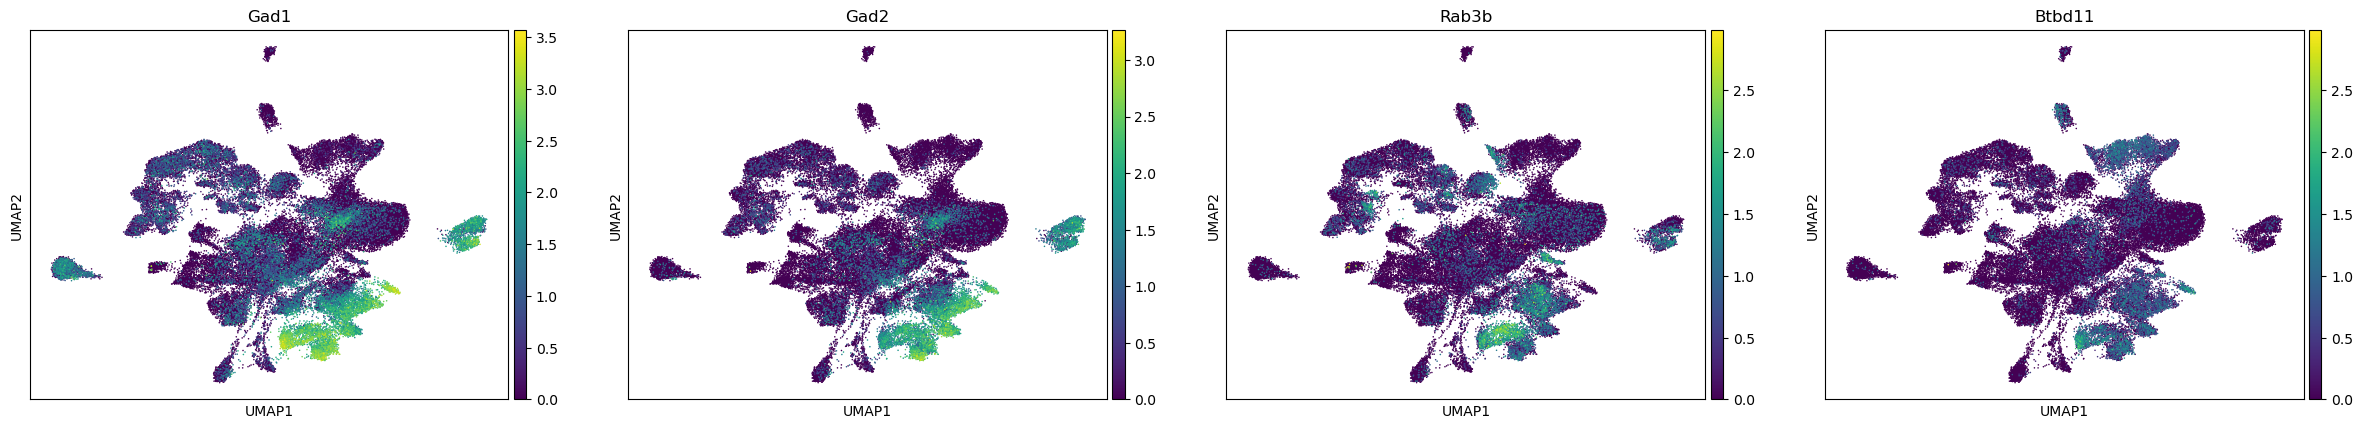

In [21]:
#Inhibitory Neurons
sc.pl.umap(adata,
           color=["Gad1", "Gad2", "Rab3b", "Btbd11"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

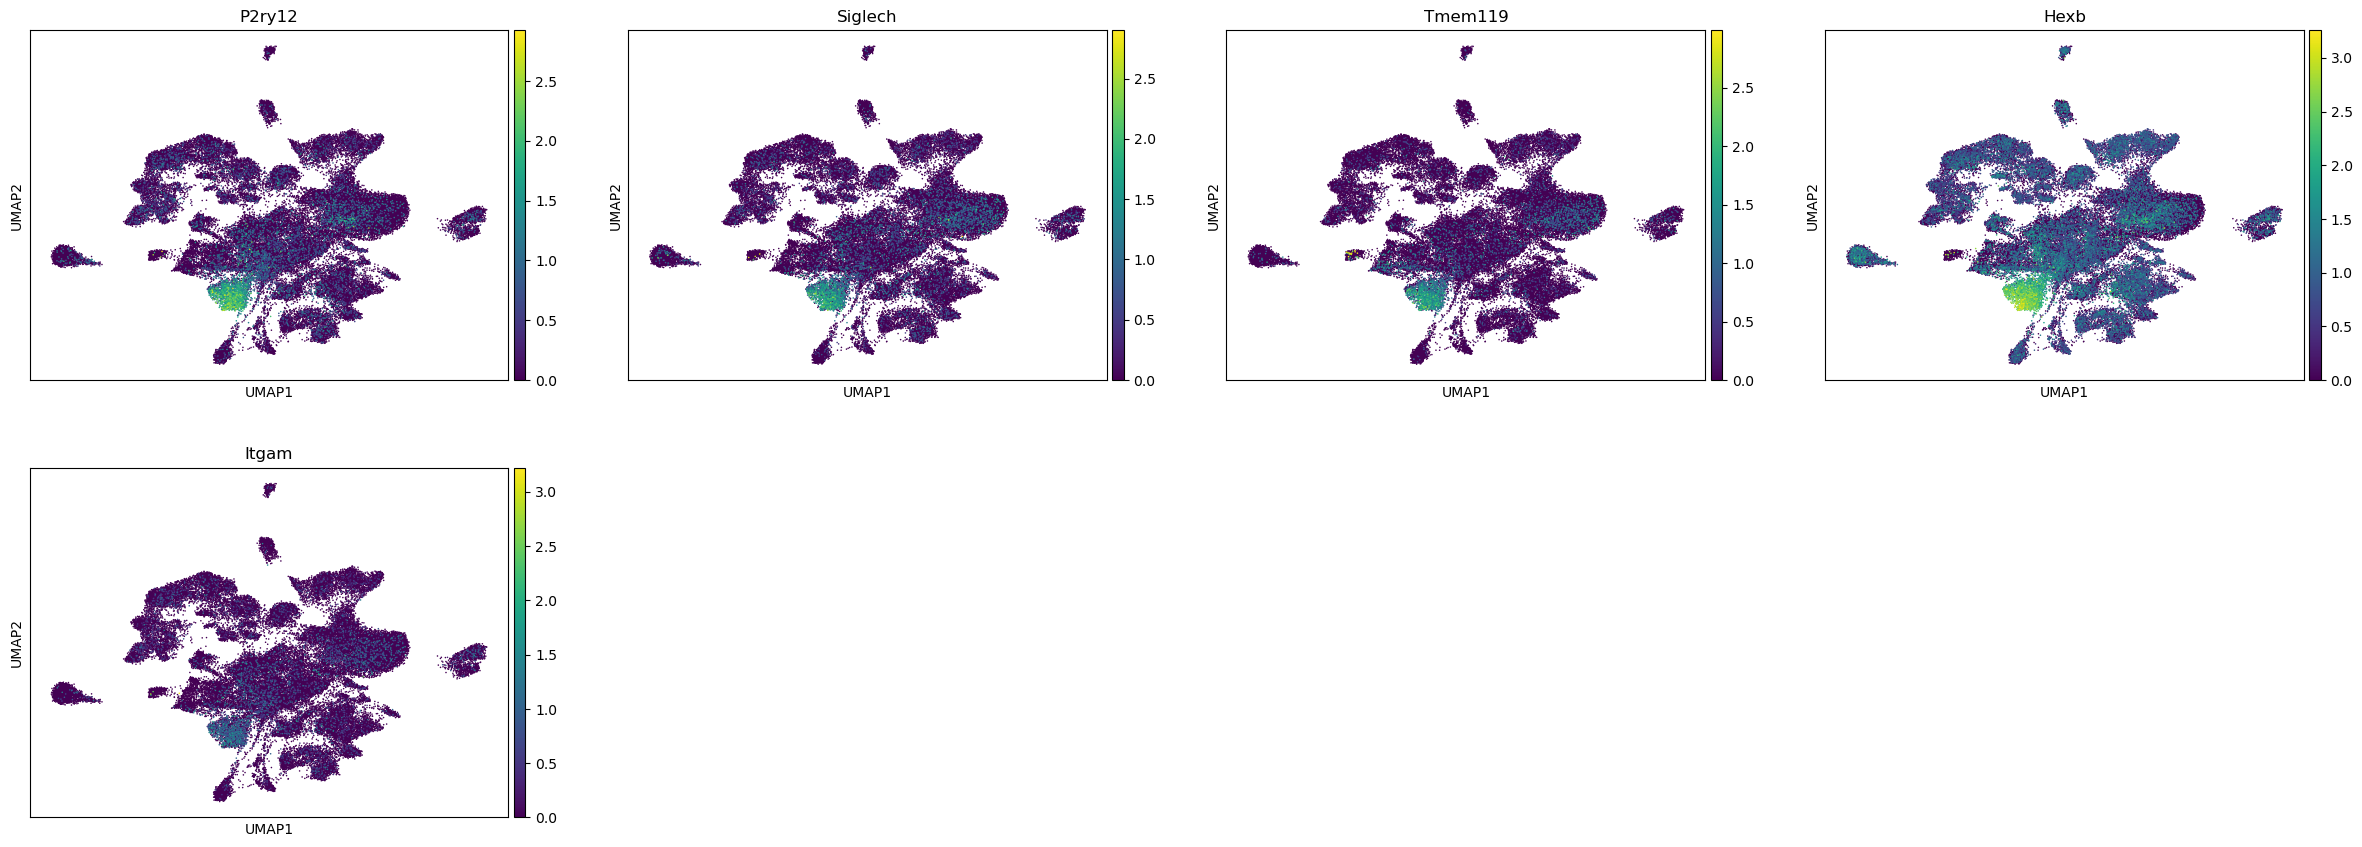

In [22]:
#Microglia
sc.pl.umap(adata,
           color=["P2ry12", "Siglech", "Tmem119", "Hexb", "Itgam"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

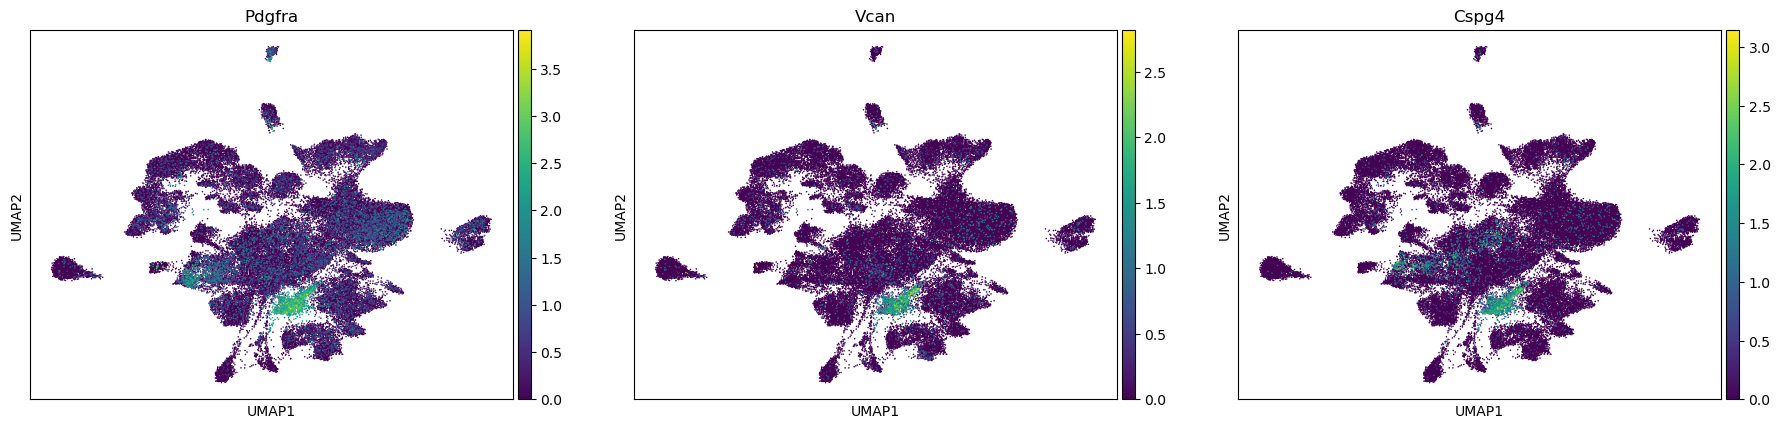

In [23]:
#OPC
sc.pl.umap(adata,
           color=["Pdgfra", "Vcan", "Cspg4"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

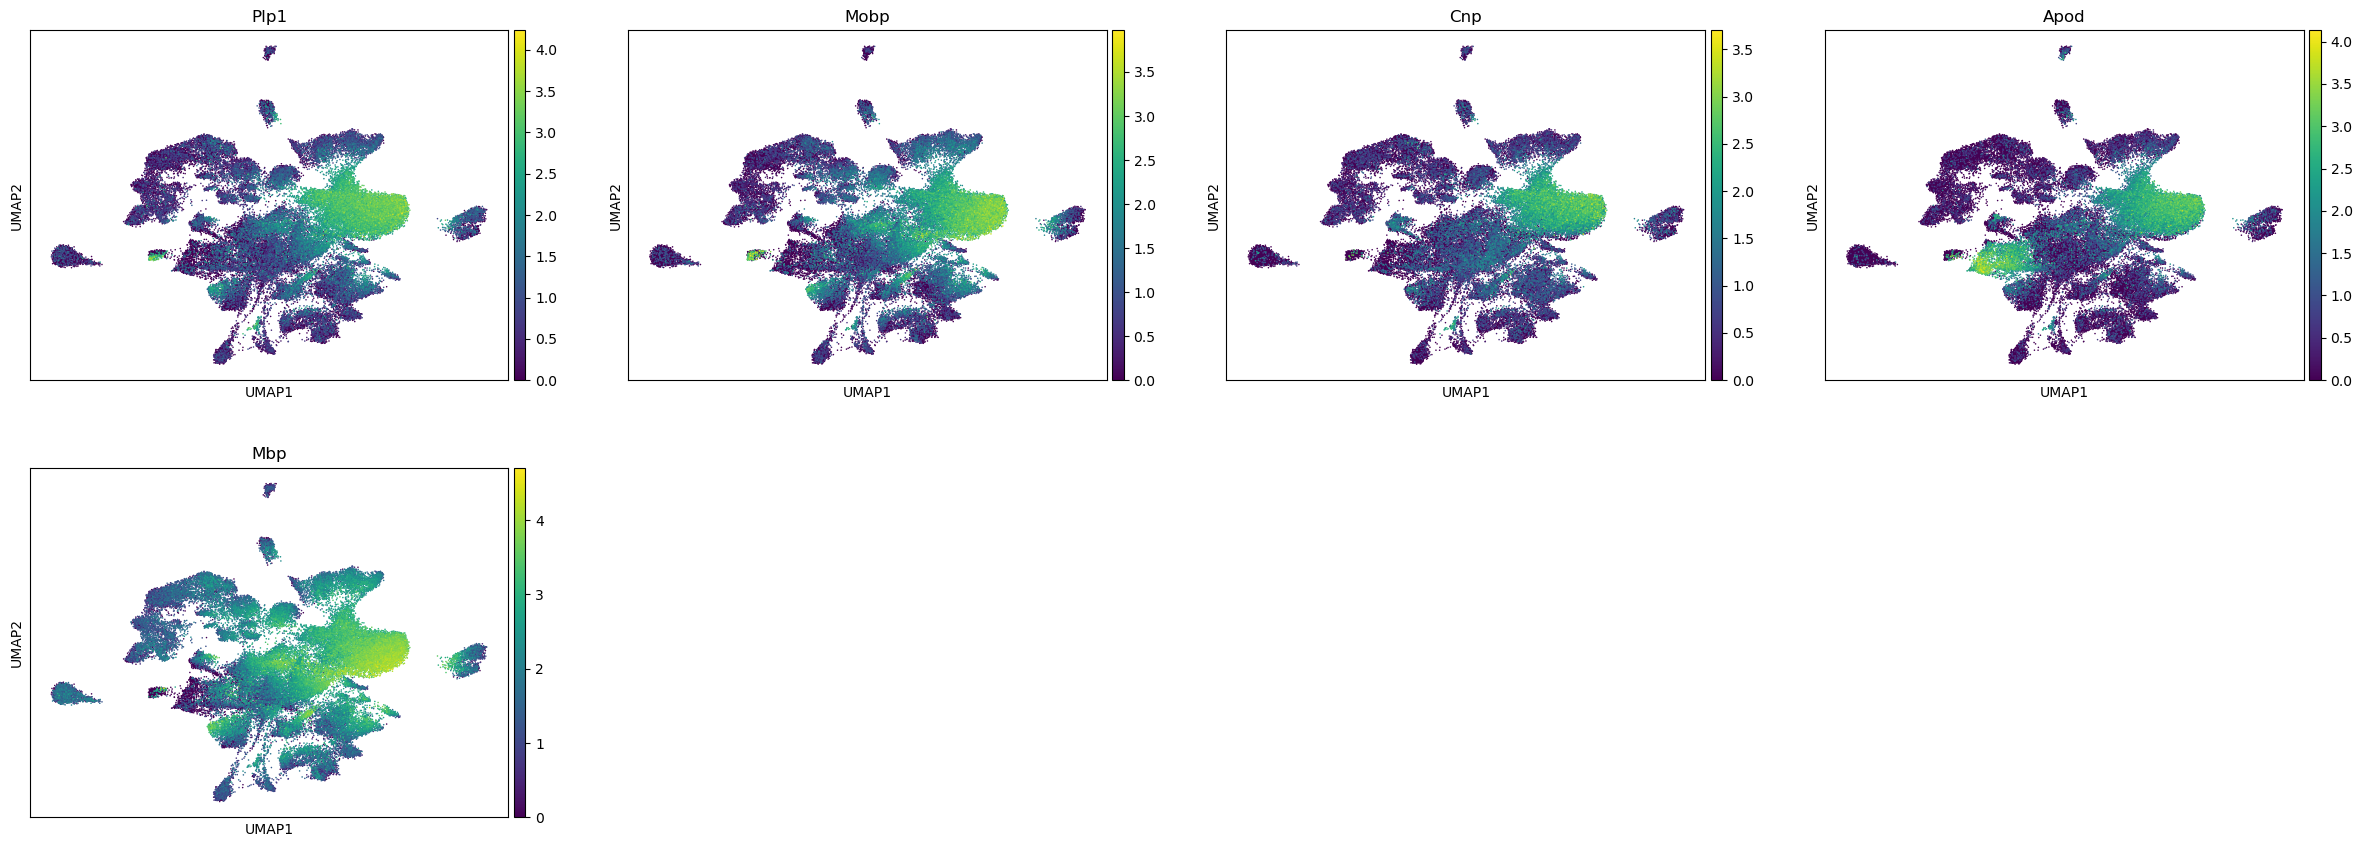

In [24]:
#Oligodendrocytes
sc.pl.umap(adata,
           color=["Plp1", "Mobp", "Cnp", "Apod", "Mbp"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

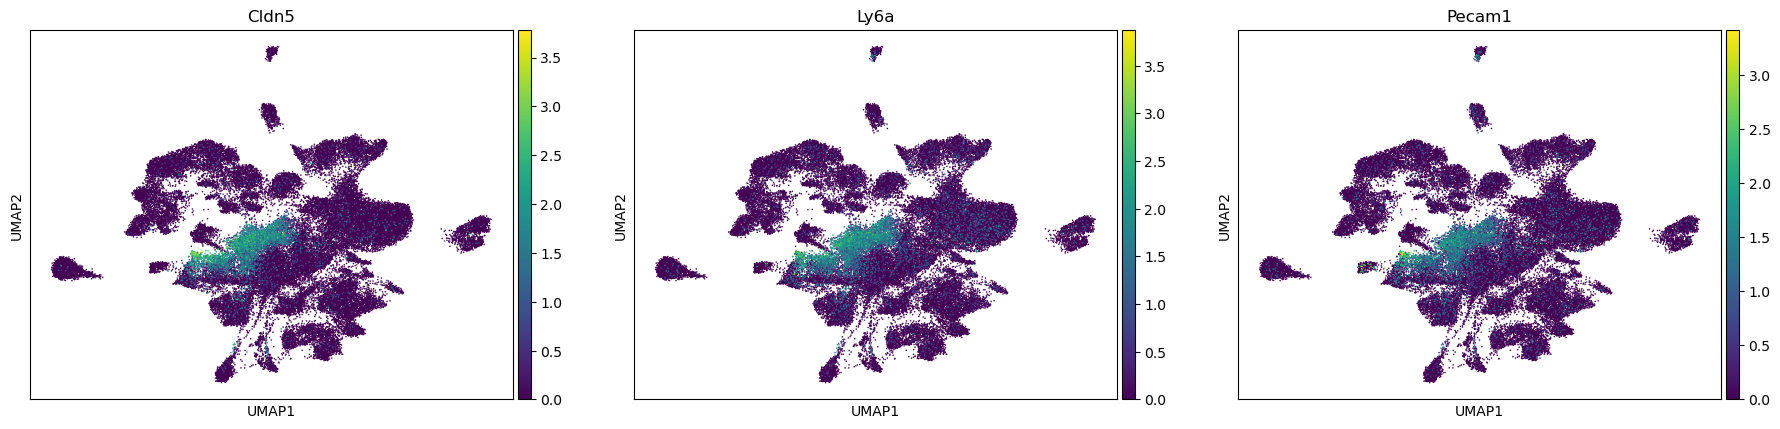

In [25]:
#Perciytes/Endothelial
sc.pl.umap(adata,
           color=["Cldn5", "Ly6a", "Pecam1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

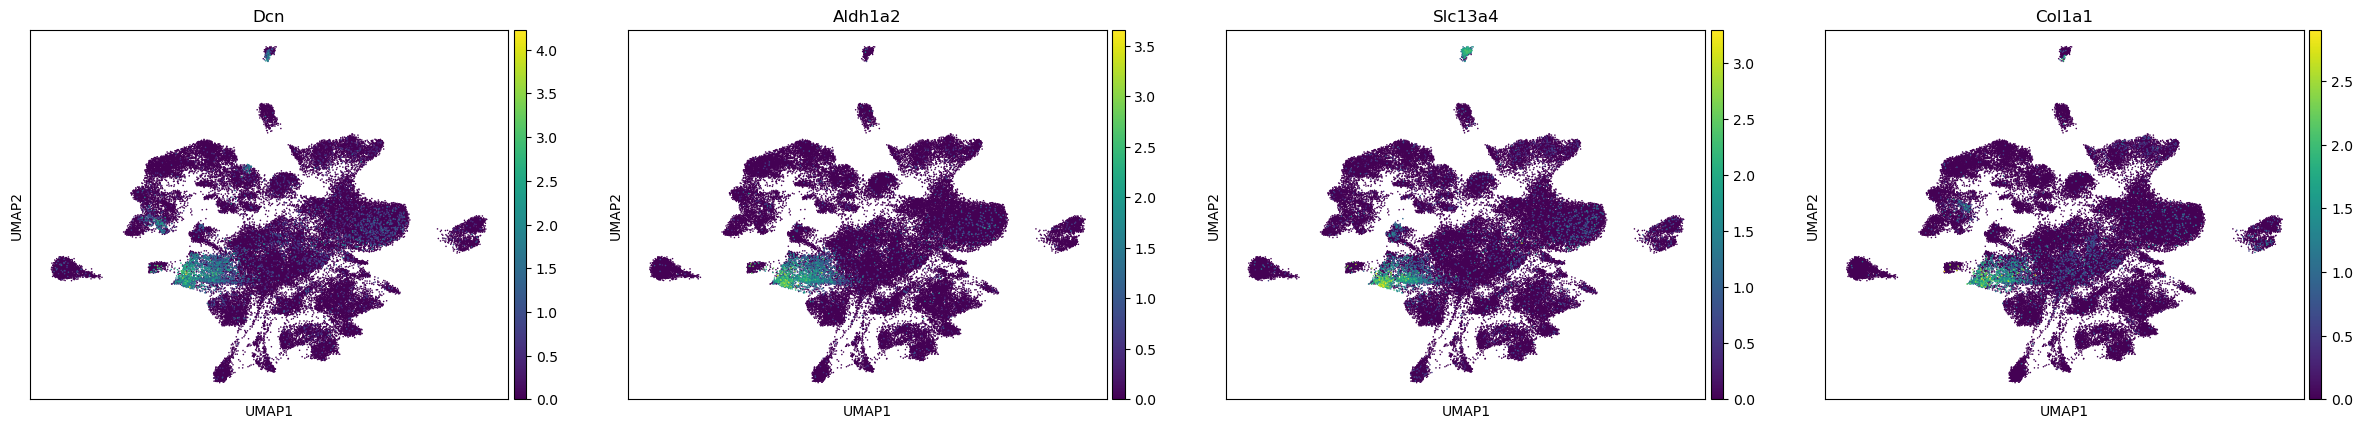

In [26]:
#Fibroblast
sc.pl.umap(adata,
           color=["Dcn", "Aldh1a2", "Slc13a4", "Col1a1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

In [27]:
labels= {"0":"Oligodendrocytes",
'1':"Perciytes/Endothelial",
'2':"Inhibitory Neurons",
'3':"Astrocytes",
'4':"Astrocytes",
'5':"Excitory Neurons",
'6':"Fibroblast",
'7':"Excitory Neurons",
'8':"Inhibitory Neurons",
'9':"Excitory Neurons",
'10':"Microglia",
'11':"Excitory Neurons",
'12':"Excitory Neurons",
'13':"Excitory Neurons",
'14':"Excitory Neurons",
'15':"-",
'16':"Oligodendrocytes",
'17':"OPC",
'18':"Oligodendrocytes",
'19':"Excitory Neurons",
'20':"Astrocytes",
'21':"Astrocytes",
'22':"Excitory Neurons",
'23':"Excitory Neurons",
'24':"Inhibitory Neurons",
'25':"Excitory Neurons",
'26':"Excitory Neurons",
'27':"Oligodendrocytes",
'28':"-",
'29':"Inhibitory Neurons",
'30':"-"}

In [28]:
# Assign cell type labels to single cells in adata
adata.obs["cell_type"] = adata.obs["leiden"].map(labels)

In [29]:
adata.obs["cell_type"]

aaadnakl-1          Astrocytes
aaaeaoem-1          Astrocytes
aaaebjlp-1          Astrocytes
aaahenla-1          Astrocytes
aaahgemb-1          Astrocytes
                    ...       
oimgdpai-1          Fibroblast
oimhkkko-1          Fibroblast
oiminpdh-1    Oligodendrocytes
oimjabgg-1    Oligodendrocytes
oimjaijc-1    Oligodendrocytes
Name: cell_type, Length: 59090, dtype: object

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


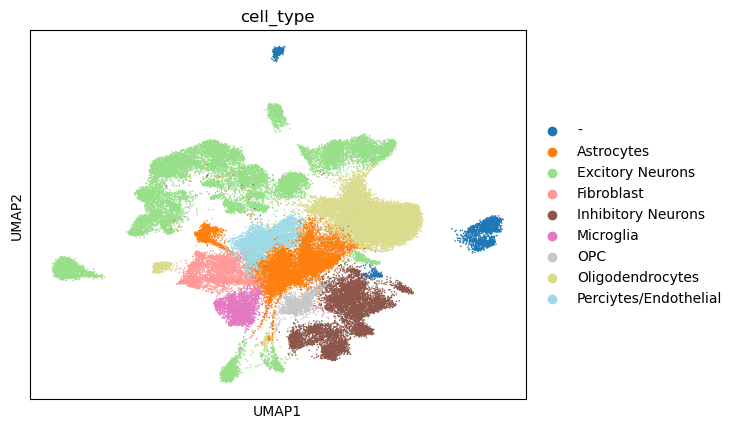

In [30]:
sc.pl.umap(adata,
           color=['cell_type'],
           size=5,
           palette= "tab20")

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

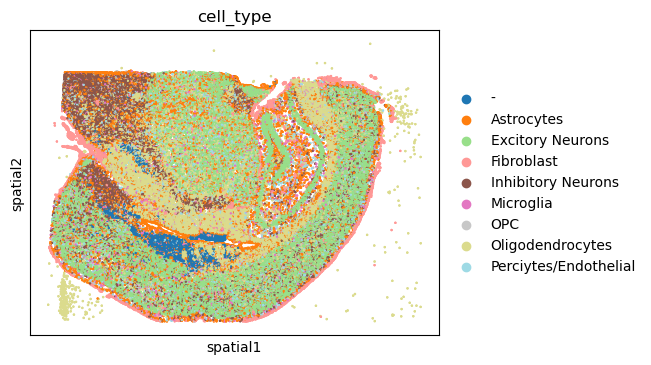

In [31]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=["cell_type"],
    wspace=0.4,
)

In [32]:
adata

AnnData object with n_obs × n_vars = 59090 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cell_type_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [33]:
adata.write("Xenium_WT_134.h5ad")

In [6]:
adata= sc.read_h5ad("Xenium_WT_134.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 59090 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'